In [1]:
import numpy as np

In [7]:
n = 100
B = np.random.choice(range(100), 100, replace=True)
print(f"The bootstrapped sample, B, contains {len(np.unique(B))/n*100:.2f}% of the elements of X.")

The bootstrapped sample, B, contains 62.00% of the elements of X.


In [8]:
from sklearn.utils import resample
n = 1000
X = range(n)
B = resample(X)
print(f"The bootstrapped sample, B, contains {len(np.unique(B))/n*100:.2f}% of the elements of X.")

The bootstrapped sample, B, contains 63.60% of the elements of X.


In [10]:
from sklearn.utils import resample
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import mode
from matplotlib import pyplot as plt

In [29]:
X, y = load_iris(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=1/3)
C = DecisionTreeClassifier()
score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
# print(score)

n = len(X_tr)
y_ps = []
for j in range(200):
    I = resample(range(n))
    X_b = X_tr[I]
    y_b = y_tr[I]
    C.fit(X_b, y_b)
    y_p = C.predict(X_te)
    y_ps.append(y_p)

y_ps = np.array(y_ps)
sum(mode(y_ps, axis=0)[0][0] == y_te)
# plt.plot(np.sum(np.equal(y_preds, y_te.reshape(-1, 1)), axis=0))

48

In [69]:
correct = []

for j in range(100):
    I = np.random.choice(range(100), j + 1, replace=False)
    Y = mode(y_preds[:, I], axis=1)[0].reshape(-1)
    correct.append(np.sum(Y == y_te))

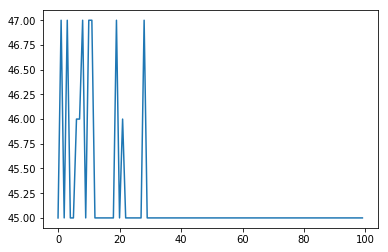

In [70]:
plt.plot(correct)

In [34]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor

correct = []
for j in range(200):
    BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators=j + 1)
    BC.fit(X_tr, y_tr)
    correct.append(np.equal(BC.predict(X_te), y_te).sum())

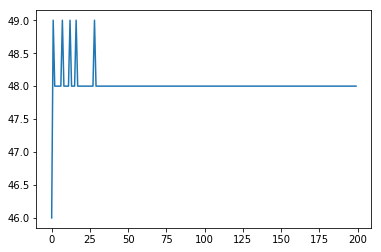

In [35]:
plt.plot(correct)

In [38]:
BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
score = cross_val_score(BC, X, y, scoring="accuracy", cv=5).mean()
BC.fit(X_tr, y_tr)
y_p = BC.predict(X_te)
sum(y_p == y_te)

48

In [115]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
C = DecisionTreeClassifier()
score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
print(score)

BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)
score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
print(score)

0.7770739020576344
0.7759231351479057


In [41]:
BC.estimators_[17].predict(X_te)

array([1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1,
       1, 1, 2, 1, 2, 0])

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
C = DecisionTreeClassifier()
RC = RandomForestClassifier(n_estimators=100, max_features=2)
RC.fit(X_tr, y_tr)
y_p = RC.predict(X_te)
sum(y_p == y_te)

48

In [80]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=1/3)
C = DecisionTreeClassifier()
score = cross_val_score(C, X, y, scoring="accuracy", cv=5).mean()
# print(score)

n = len(X_tr)
y_ps = []
Js = []
for j in range(200):
    I = resample(range(n))
    J = np.random.choice(range(30), 5)
    Js.append(np.in1d(range(30), J))
    X_b = X_tr[I][:,J]
    y_b = y_tr[I]
    C.fit(X_b, y_b)
    y_p = C.predict(X_te[:, J])
    y_ps.append(y_p)

y_ps = np.array(y_ps)
sum(mode(y_ps, axis=0)[0][0] == y_te)/len(y_te)


0.9526315789473684

In [84]:
A = np.array(Js) + 0.0

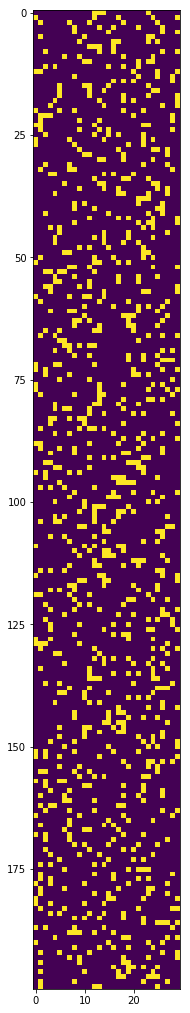

In [90]:
plt.figure(figsize=(3/20*18, 18))
plt.imshow(A)
plt.show()